<a href="https://colab.research.google.com/github/zots0127/Colabs/blob/main/learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gym-Pybullet-Drones learn example**
-----
Demonstration of the learn example from Dynamic System Lab's gym_pybullet_drones project. Find the project's home page [here](https://github.com/utiasDSL/gym-pybullet-drones).

------
Script demonstrating the use of `gym_pybullet_drones`' Gym interface.

Class TakeoffAviary is used as a learning env for the A2C and PPO algorithms.

**Notes**

-----
The boolean argument --rllib switches between `stable-baselines3` and `ray[rllib]`.
This is a minimal working example integrating `gym-pybullet-drones` with 
reinforcement learning libraries `stable-baselines3` and `ray[rllib]`.
It is not meant as a good/effective learning example.

gym_pybullet_drones requires Python3.8, so the first step is to install it into colab.


In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2

!sudo apt install python3-pip
!python -m pip install --upgrade pip
!python -m pip install ipykernel

!python --version

# !pip install gym-pybullet-drones
# For now we clone from git, after repo is uploaded to pypi we can call pip install directly 
!git clone https://github.com/utiasDSL/gym-pybullet-drones.git
!python3 -m pip install -e gym-pybullet-drones

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [813 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,830 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports 

### Configure example options

When running in headless mode, all gui interfaces must be supressed. Additionally, plots are saved rather than displayed using colab = true. All other options are available to you.

paramter          |value             |description
------------------|------------------|------------------------------------------
rllib             |bool              |switches between `stable-baselines3` and `ray[rllib]` 
record_video      |bool              |whether to record video of the simulation. Recommended to keep true as this is the only way to view the simulation headless 
output_folder     |path              |folder to save simulation results 

In [ ]:
rllib = False
record_video=True
output_folder='results'

!python -m gym_pybullet_drones.examples.learn \
      --rllib=$rllib \
      --gui=false \
      --record_video=$record_video \
      --output_folder=$output_folder \
      --colab=true \

pybullet build time: May 20 2022 19:44:17
[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
/usr/local/lib/python3.8/dist-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
[INFO] Action space: Box([-1. -1. -1. -1.], [1. 1. 1. 1.], (4,), float32)
[INFO] Observation space: Box([-1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1.], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], (12,), float32)
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                

###Display simulation plotted results. 

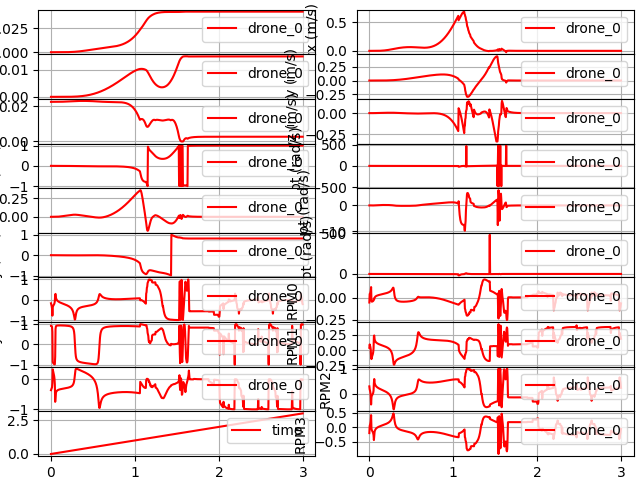

In [ ]:
from PIL import Image as pilImage
import os

im = pilImage.open(os.path.join('results', 'output_figure.png'))
im

###Display simulation video result. 

Note: record_video must be = true

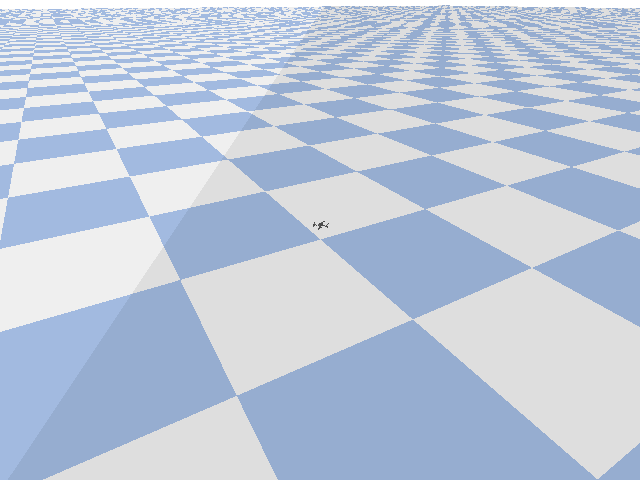

In [ ]:
output = None
if record_video:
  # Display simulation result 
  import glob
  import os
  from PIL import Image as pilImage

  def make_gif(frame_folder):
      frames = []
      try:
        i = 0
        while i > -1:
          frames += [pilImage.open(os.path.join(f"{frame_folder}", f"frame_{i}.png"))]
          i+=1
      except Exception as e:
        pass

      frame_one = frames[0]
      frame_one.save("example_output.gif", format="GIF", append_images=frames,
                save_all=True, duration=3000//len(frames), loop=0)
      
  videos = glob.glob('./results/recording_*/')
  videos.sort()
  make_gif(videos[-1])

  from IPython.display import Image as ipyImage
  output = ipyImage(open('example_output.gif','rb').read())
output